In [1]:
# !curl "http://www.codeheroku.com/static/workshop/datasets/malaria_detection/train.csv" -o "train.csv" 
# !curl "http://www.codeheroku.com/static/workshop/datasets/malaria_detection/test.csv" -o "test.csv" 

In [27]:
!pip install --upgrade tensorflow
!pip install --upgrade numpy
from tensorflow import keras 
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from tensorflow.keras import backend
from tensorflow.keras import metrics as metrics_module

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# data set of image is converted in to csv file 
# file is infected at last uninfexted vlaue 

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Deep/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Deep/test.csv")

In [5]:
# uninfected sell 
train.tail()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
22041,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,183,62,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,113,181,182,183,182,180,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22042,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,47,172,175,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,28,179,178,178,178,178,86,0,134,175,175,176,177,175,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22043,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,186,186,96,0,0,0,...,0,0,0,0,0,0,83,186,181,0,0,0,0,0,0,0,0,13,185,183,183,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22044,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,139,186,185,183,183,132,12,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14,149,189,120,18,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22045,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,103,179,179,182,186,187,188,187,186,187,187,62,7,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10,29,73,188,185,51,29,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# infected data 
train.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,187,0,0,0,0,0,0,0,0,...,0,0,61,187,186,188,188,186,187,187,188,187,187,186,187,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,49,90,48,...,45,167,187,188,188,187,188,188,131,31,0,38,33,0,35,52,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parasitized,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,155,190,190,190,192,190,191,190,20,1,1,1,1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,1,64,183,182,182,185,189,190,95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,152,186,185,176,5,5,5,2,0,0,0,...,0,0,0,0,0,0,0,0,5,155,186,185,174,5,0,0,5,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,10,188,187,185,184,185,183,181,181,180,180,180,180,180,179,179,179,180,178,179,133,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,63,187,188,188,188,64,0,0,148,190,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train.describe()
# pixel one is o to 200 so it's grey scale image 


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
count,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,...,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000,22046.000000
mean,0.082691,0.158396,0.263313,0.462624,0.699809,0.940533,1.256237,1.752245,2.414678,3.455502,4.894448,6.575388,8.821691,11.601742,15.220176,20.353851,26.642021,34.281638,42.812846,51.759231,60.642974,68.570852,75.127053,79.954504,81.961989,81.831534,79.557017,74.020276,66.999546,58.748299,49.812846,40.734464,32.374671,25.247845,18.924930,13.978091,10.153089,7.455910,5.356482,3.827815,...,3.874535,5.252835,7.436769,10.190012,13.718906,18.233648,24.221083,31.966207,40.813027,50.560646,60.395219,69.537512,76.563640,82.182119,84.872312,85.604509,83.575342,78.341785,71.273973,62.507167,53.082146,43.465663,34.124603,25.977864,19.481584,14.429919,10.359249,7.375397,5.526535,4.069718,2.935907,2.144289,1.475506,1.036242,0.735553,0.457543,0.264901,0.167559,0.089631,0.044861
std,3.222090,4.543716,6.065143,8.100107,10.053545,11.834619,13.789559,16.426943,19.113640,23.061772,27.405171,31.785211,36.653899,41.835442,47.156650,53.873886,60.308225,66.870925,72.500710,77.018895,80.574145,82.724369,83.849667,84.520405,84.616181,84.323520,84.623865,83.764289,82.245575,79.846805,76.168357,71.154628,65.276253,58.971822,51.987012,45.225648,39.079061,33.551842,28.392671,24.208123,...,24.789951,28.654528,33.867067,39.392504,45.508114,51.573124,58.587599,65.576126,72.213255,77.688168,81.854403,84.375577,85.994131,86.590532,86.655078,86.777846,86.790035,86.266996,85.005583,82.692775,79.076957,74.032516,67.672453,60.453292,53.563240,46.665045,39.924214,33.762774,29.493983,25.343608,21.399852,18.230696,15.027315,12.475082,10.453670,7.980879,5.996918,4.624739,3.298136,2.566040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [8]:
# converting data into test and train 
#  where x is value of pixel
#  y is infected or not infected or not 

X_train  = train.drop(['label'],axis=1).values
y_train  = train['label'].values

X_test  = test.drop(['label'],axis=1).values
y_test  = test['label'].values


In [9]:
X_train.shape , y_train.shape

((22046, 2500), (22046,))

In [10]:
X_test.shape, y_test.shape

((5512, 2500), (5512,))

Uninfected


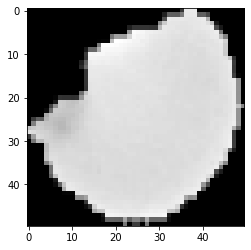

In [11]:
# now plot the first value of 

import matplotlib.pyplot as plt
# which sell to take 
index = 20000
#  if there is no sport maleriya free otherwise
plt.imshow(X_train[index].reshape(50,50),cmap='gray')
print(y_train[index])

In [12]:
# cnn take two shape data 
# reshape our data 
# division by 255 beacuse to normalize the value 
# max  value of x is 255
#  1 so we have gray scale image 

X_train = X_train.reshape(train.shape[0],50,50,1).astype('float32')
X_train = X_train / 255.0

X_test = X_test.reshape(test.shape[0],50,50,1).astype('float32')
X_test = X_test / 255.0

In [13]:
from sklearn import preprocessing
#  to convert the infected and uninfexted into o and 1  so y is used 


lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)



In [14]:
y_train[0]
# infected is 0 


array([0])

In [15]:
y_train[20000]
# uninfected is converted into 1


array([1])

In [16]:
print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)
# we have the x_train and Y_train data 
# y_train is one dimentional data 


X_train shape (22046, 50, 50, 1)
Y_train shape (22046, 1)


In [17]:
# Malaria detection 
# alexnet
# we reduce number of layer 
# input size 
# 50*50 size gray scale 
# filter size 3*3
# activation function is relu 
# we have 60 filter 
# used also  dropout to rduce overfit


In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [20]:
model = Sequential()
# padding same = outout is same size of input 
#  padding is valid is output size is minimuze
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=2 , padding='same'))



model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2 , padding='same'))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2 , padding='same'))
# dropout probability to reuce overfitting in network 

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))
# last layer we used the softmax as 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [21]:
# optimizer or hyper parameter 
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
441/441 [==============================] - 6s 10ms/step - loss: 0.5744 - accuracy: 0.6632
Epoch 2/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1953 - accuracy: 0.9313
Epoch 3/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1633 - accuracy: 0.9421
Epoch 4/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1438 - accuracy: 0.9482
Epoch 5/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1362 - accuracy: 0.9504
Epoch 6/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1301 - accuracy: 0.9541
Epoch 7/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1229 - accuracy: 0.9553
Epoch 8/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1146 - accuracy: 0.9578
Epoch 9/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1085 - accuracy: 0.9600
Epoch 10/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1020 - accuracy: 0.963

In [23]:
# rediction on the test data 
predictions = model.evaluate(X_test,y_test)


173/173 [==============================] - 1s 4ms/step - loss: 0.2185 - accuracy: 0.9490


In [30]:
# # Add an extra axis
# print(f"Shape before new dimension: {steak.shape}")
# steak = tf.expand_dims(X_test[index], axis=0) # add an extra dimension at axis 0
# #steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
# print(f"Shape after new dimension: {steak.shape}")
# steak

Actual [1. 0.]
Predicted [[9.999974e-01 2.649533e-06]]


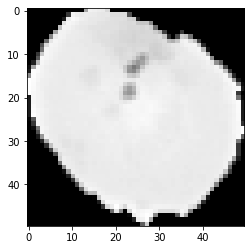

In [35]:

index = 1
import numpy as np
plt.imshow(X_test[index].reshape(50,50),cmap='gray')
print("Actual",y_test[index])
# [[X_test[index]]]
print("Predicted", model.predict(tf.expand_dims(X_test[index], axis=0)))

In [ ]:
#  0 is infected and 1 is uninfected 